In [1]:
# import libraries
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
from  sklearn.preprocessing import StandardScaler
from  sklearn.preprocessing import LabelEncoder
from  sklearn.preprocessing import OneHotEncoder 
from  sklearn.externals import joblib
from sklearn.neighbors import LocalOutlierFactor
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

# read from excel sheet
data = pd.read_excel('../data/1-8-19/print_data.xlsx',sheet_name = 'Volume').iloc[:,[1,2,3,4,5]].values

In [ ]:
# plot data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
ax.scatter(data[:,0],data[:,1],data[:,3])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
print(data[0:3,:])

In [4]:
# process the data
X = data[:,1:]
print(X[0,:])
Y = data[:,[0]] # this is critical
Y.reshape(-1,1)

# Label Encode the Resin Types
lenc = LabelEncoder()
X[:,-1] = lenc.fit_transform(X[:,-1])
#one hot encode the variables
one_hot = OneHotEncoder(categorical_features = [-1]) # categories are encoded in the last section
X = one_hot.fit_transform(X).toarray() # creates one hot encoding

# scale the data
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_norm = x_scaler.fit_transform(X)
Y_norm = y_scaler.fit_transform(Y)

# address outliers
LOF = LocalOutlierFactor(n_neighbors = 10)
X_LOF = LOF.fit_predict(X_norm)

# Save the Scalers so we can use it in the quote tool

# x_scaler_filename = "X_scaler.save"
# y_scaler_filename = "Y_scaler.save"

# joblib.dump(x_scaler,x_scaler_filename)
# joblib.dump(y_scaler,y_scaler_filename)

# lenc_filename = "Lenc.save"
# one_hot_filename = "One_Hot.save"
# joblib.dump(lenc,lenc_filename)
# joblib.dump(one_hot,one_hot_filename)

[911 50 13.96 'White V4']
[[4.295530277777777 911 50 13.96 4]
 [4.1529863888888885 463 50 22.29 4]
 [40.08953888888889 5131 25 150.97 0]]


C:\Users\Scarecrow\AppData\Local\conda\conda\envs\TF\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Scarecrow\AppData\Local\conda\conda\envs\TF\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Scarecrow\AppData\Local\conda\conda\envs\TF\lib\sit

array([-0.588562  , -0.60352167, -0.45241393, -0.40477377,  2.24918286,
       -0.15989207, -0.54189167, -0.7170354 ])

In [5]:
# print out local outliers and delete from the training set
outliers = []
print(len(X_norm))
for i in range(0,len(X_LOF)):
    if X_LOF[i] == -1:
        print(data_unfucked[i,:])
        # record the index
        outliers.append(i)
        
print(len(X_norm))
# delete this out of the training set
X_norm = np.delete(X_norm,outliers,0)
Y_norm = np.delete(Y_norm,outliers,0)
print(len(X_norm))        
        

206
[911 50 13.96 'White V4' 1.7933070866141732]
[6741 25 120.74 'Clear V4' 6.63484251968504]
[1626 50 257.89 'Clear V4' 3.2007874015748032]
[3360 50 76.5 'Clear V4' 6.614173228346457]
[737 100 53.35 'White V4' 2.9015748031496065]
[603 50 53.02 'White V4' 1.1870078740157481]
[462 50 43.76 'White V4' 0.909448818897638]
[210 100 32.94 'White V4' 0.8267716535433072]
[971 100 286.6 'Tough V5' 3.822834645669291]
[2193 50 129.86 'Clear V4' 4.3169291338582685]
[446 100 24.17 'White V4' 1.7559055118110238]
[837 50 9.11 'White V4' 1.6476377952755907]
[903 50 12.44 'White V4' 1.7775590551181102]
[2710 25 7.14 'Clear V4' 2.6673228346456694]
[442 100 32.81 'White V4' 1.7401574803149609]
[705 100 24.39 'Tough V5' 2.7755905511811023]
[306 100 49.94 'White V4' 1.204724409448819]
[181 100 131.22 'Black' 0.7125984251968505]
[1344 100 238.68 'Tough V5' 5.291338582677166]
[857 100 33.49 'White V4' 3.3740157480314963]
[1000 100 265.73 'Grey V4' 3.937007874015748]
206
185


In [7]:
## IMPORTING THE ANN LIBRARIES ##

# Sequential initializes the neural net
# dense allows you to create the layers

def build_net(layers,init_dim,out_dims,inits,
              activations,loss_func,optimizer_func):
    
    # initialize the ANN
    model = Sequential()
    for i in range(0,layers):
       if i == 0:
            # Number of nodes in first layer, weight initialization, 
            # activation function, input dimension
            model.add(Dense(output_dim = output_dims[i],init = inits[i],
                            activation = activations[i],input_dim = init_dim))

        else:
            # add subsequent layer
            model.add(Dense(output_dim = output_dims[i],init = inits[i],
                      activation = activations[i]))

    model.compile(loss = loss_func,optimizer = optimizer_func) 
    
    return model



Using TensorFlow backend.


In [9]:
num_layers   = 4 # 
initial = dim #dimension of initial vector
output_dims = [6,3,2,1] #output dimension of each layer
initialize    = ['he_normal','he_normal','he_normal','he_normal']
activations_func = ['relu','relu','relu','linear']
loss_function   = 'mse'
optimizer_function = 'adam'

NN_model = build_net(layers=num_layers,init_dim=initial,out_dims=output_dims,
                     inits=initialize,activations=activations_func,
                     loss_func=loss_function,optimizer_func=optimizer_function)


C:\Users\Scarecrow\AppData\Local\conda\conda\envs\TF\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=8, units=6, kernel_initializer="he_normal", activation="relu")`
C:\Users\Scarecrow\AppData\Local\conda\conda\envs\TF\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3, kernel_initializer="he_normal", activation="relu")`
C:\Users\Scarecrow\AppData\Local\conda\conda\envs\TF\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2, kernel_initializer="he_normal", activation="relu")`
C:\Users\Scarecrow\AppData\Local\conda\conda\envs\TF\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_normal", activation="linear")`


In [10]:
# Split the Dataset into k-fold for cross validation
from sklearn.model_selection import train_test_split
# split into 90% for train and 10% for test
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y_norm, test_size=0.10, random_state = 0)
NN_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=400, batch_size=25,verbose = 1)

Train on 166 samples, validate on 19 samples
Epoch 1/400
166/166 [==============================] - 0s 3ms/step - loss: 1.0728 - val_loss: 1.2113
Epoch 2/400
166/166 [==============================] - 0s 78us/step - loss: 0.9948 - val_loss: 1.1066
Epoch 3/400
166/166 [==============================] - 0s 78us/step - loss: 0.9281 - val_loss: 1.0157
Epoch 4/400
166/166 [==============================] - 0s 66us/step - loss: 0.8819 - val_loss: 0.9526
Epoch 5/400
166/166 [==============================] - 0s 66us/step - loss: 0.8522 - val_loss: 0.8967
Epoch 6/400
166/166 [==============================] - 0s 84us/step - loss: 0.8223 - val_loss: 0.8539
Epoch 7/400
166/166 [==============================] - 0s 72us/step - loss: 0.7957 - val_loss: 0.8154
Epoch 8/400
166/166 [==============================] - 0s 66us/step - loss: 0.7745 - val_loss: 0.7797
Epoch 9/400
166/166 [==============================] - 0s 54us/step - loss: 0.7533 - val_loss: 0.7483
Epoch 10/400
166/166 [================

166/166 [==============================] - 0s 78us/step - loss: 0.2827 - val_loss: 0.4141
Epoch 81/400
166/166 [==============================] - 0s 78us/step - loss: 0.2812 - val_loss: 0.4130
Epoch 82/400
166/166 [==============================] - 0s 72us/step - loss: 0.2797 - val_loss: 0.4123
Epoch 83/400
166/166 [==============================] - 0s 66us/step - loss: 0.2783 - val_loss: 0.4118
Epoch 84/400
166/166 [==============================] - 0s 78us/step - loss: 0.2772 - val_loss: 0.4111
Epoch 85/400
166/166 [==============================] - 0s 78us/step - loss: 0.2759 - val_loss: 0.4107
Epoch 86/400
166/166 [==============================] - 0s 84us/step - loss: 0.2746 - val_loss: 0.4102
Epoch 87/400
166/166 [==============================] - 0s 60us/step - loss: 0.2737 - val_loss: 0.4097
Epoch 88/400
166/166 [==============================] - 0s 66us/step - loss: 0.2722 - val_loss: 0.4091
Epoch 89/400
166/166 [==============================] - 0s 66us/step - loss: 0.2710 - 

166/166 [==============================] - 0s 60us/step - loss: 0.2175 - val_loss: 0.3742
Epoch 159/400
166/166 [==============================] - 0s 66us/step - loss: 0.2172 - val_loss: 0.3740
Epoch 160/400
166/166 [==============================] - 0s 54us/step - loss: 0.2168 - val_loss: 0.3736
Epoch 161/400
166/166 [==============================] - 0s 66us/step - loss: 0.2163 - val_loss: 0.3731
Epoch 162/400
166/166 [==============================] - 0s 78us/step - loss: 0.2160 - val_loss: 0.3725
Epoch 163/400
166/166 [==============================] - 0s 72us/step - loss: 0.2157 - val_loss: 0.3717
Epoch 164/400
166/166 [==============================] - 0s 60us/step - loss: 0.2153 - val_loss: 0.3714
Epoch 165/400
166/166 [==============================] - 0s 66us/step - loss: 0.2148 - val_loss: 0.3708
Epoch 166/400
166/166 [==============================] - 0s 84us/step - loss: 0.2147 - val_loss: 0.3702
Epoch 167/400
166/166 [==============================] - 0s 54us/step - loss: 

Epoch 237/400
166/166 [==============================] - 0s 60us/step - loss: 0.1984 - val_loss: 0.3480
Epoch 238/400
166/166 [==============================] - 0s 60us/step - loss: 0.1981 - val_loss: 0.3475
Epoch 239/400
166/166 [==============================] - 0s 96us/step - loss: 0.1982 - val_loss: 0.3471
Epoch 240/400
166/166 [==============================] - 0s 72us/step - loss: 0.1980 - val_loss: 0.3472
Epoch 241/400
166/166 [==============================] - 0s 54us/step - loss: 0.1981 - val_loss: 0.3476
Epoch 242/400
166/166 [==============================] - 0s 66us/step - loss: 0.1976 - val_loss: 0.3473
Epoch 243/400
166/166 [==============================] - 0s 72us/step - loss: 0.1975 - val_loss: 0.3470
Epoch 244/400
166/166 [==============================] - 0s 66us/step - loss: 0.1977 - val_loss: 0.3468
Epoch 245/400
166/166 [==============================] - 0s 60us/step - loss: 0.1974 - val_loss: 0.3472
Epoch 246/400
166/166 [==============================] - 0s 60us

166/166 [==============================] - 0s 66us/step - loss: 0.1869 - val_loss: 0.3568
Epoch 316/400
166/166 [==============================] - 0s 66us/step - loss: 0.1870 - val_loss: 0.3563
Epoch 317/400
166/166 [==============================] - 0s 78us/step - loss: 0.1869 - val_loss: 0.3561
Epoch 318/400
166/166 [==============================] - 0s 72us/step - loss: 0.1869 - val_loss: 0.3559
Epoch 319/400
166/166 [==============================] - 0s 84us/step - loss: 0.1869 - val_loss: 0.3554
Epoch 320/400
166/166 [==============================] - 0s 78us/step - loss: 0.1867 - val_loss: 0.3554
Epoch 321/400
166/166 [==============================] - 0s 60us/step - loss: 0.1867 - val_loss: 0.3552
Epoch 322/400
166/166 [==============================] - 0s 66us/step - loss: 0.1866 - val_loss: 0.3549
Epoch 323/400
166/166 [==============================] - 0s 84us/step - loss: 0.1866 - val_loss: 0.3545
Epoch 324/400
166/166 [==============================] - 0s 54us/step - loss: 

Epoch 394/400
166/166 [==============================] - 0s 78us/step - loss: 0.1837 - val_loss: 0.3455
Epoch 395/400
166/166 [==============================] - 0s 54us/step - loss: 0.1836 - val_loss: 0.3458
Epoch 396/400
166/166 [==============================] - 0s 72us/step - loss: 0.1836 - val_loss: 0.3460
Epoch 397/400
166/166 [==============================] - 0s 60us/step - loss: 0.1839 - val_loss: 0.3465
Epoch 398/400
166/166 [==============================] - 0s 72us/step - loss: 0.1836 - val_loss: 0.3467
Epoch 399/400
166/166 [==============================] - 0s 72us/step - loss: 0.1836 - val_loss: 0.3463
Epoch 400/400
166/166 [==============================] - 0s 66us/step - loss: 0.1835 - val_loss: 0.3458


In [11]:
error = []
abs_error = []
head_loss = []
import time

#Y_scaler.inverse_transform()
for i in range(0,len(X_test[:,1])):
    start_time = time.clock()
    Y_Pred_Scale = y_scaler.inverse_transform(NN_model.predict(np.array([X_test[i,:]])))
    print (time.clock() - start_time, "seconds")
    Y_Test_Scale  = y_scaler.inverse_transform([y_test[i]])
    head_loss.append(y_scaler.inverse_transform([y_test[i]]))
    print(Y_Pred_Scale)
    print(Y_Test_Scale)
    
    print('Percent Error:',round(float((Y_Pred_Scale-Y_Test_Scale)*100/Y_Test_Scale),4))
    error.append(round(float((Y_Pred_Scale-Y_Test_Scale)*100/Y_Test_Scale),4))
    abs_error.append(round(float((Y_Pred_Scale-Y_Test_Scale)),4))

0.03518236593395449 seconds
[[4.0223703]]
[-0.94898256]
Percent Error: -523.8614
0.0006297969067294573 seconds
[[5.7063]]
[-0.57929115]
Percent Error: -1085.0487
0.00046933318822548614 seconds
[[8.846744]]
[-0.10462912]
Percent Error: -8555.336
0.0007469756144616452 seconds
[[6.2467713]]
[-0.55598135]
Percent Error: -1223.5577
0.0009961736050477787 seconds
[[5.6880064]]
[-0.27568348]
Percent Error: -2163.2381
0.0010045214285537632 seconds
[[6.5758667]]
[-0.37941458]
Percent Error: -1833.1613
0.00072533310907575 seconds
[[6.5274186]]
[-0.6867254]
Percent Error: -1050.5136
0.0005759998219130938 seconds
[[13.672274]]
[0.81224695]
Percent Error: 1583.2656
0.0007627437255285155 seconds
[[5.733639]]
[1.8860674]
Percent Error: 203.9997
0.0012197097678192034 seconds
[[4.0223703]]
[-1.07453248]
Percent Error: -474.3368
0.0007785118365953789 seconds
[[6.0222077]]
[-0.44725961]
Percent Error: -1446.4681
0.0006199031899816257 seconds
[[4.0223703]]
[-0.86373782]
Percent Error: -565.6934
0.000551265

In [120]:
np.median(head_loss)
#np.median(head_loss)
np.max(error)

2349679.6341

In [122]:
X_train_unscaled = x_scaler.inverse_transform(X_train)
X_train_un_hot   = one_hot.inverse_transform(X_train_unscaled[:,:5])
try_try = np.concatenate((X_train_unscaled[:,5:],X_train_un_hot),axis = 1)
X_unencoded      = lenc.inverse_transform(try_try[:,-1].astype('int'))

# create a list of elements 
color_list = {'color' : {}}
for i in range(0,len(X_unencoded)):
    if X_unencoded[i] not in color_list['color'].keys():
        color_list['color'][X_unencoded[i]] = {}
        color_list['color'][X_unencoded[i]]['index']   = [i]
        color_list['color'][X_unencoded[i]]['y_value'] = [y_train[i]]
        color_list['color'][X_unencoded[i]]['error'] = [error[i]]
        color_list['color'][X_unencoded[i]]['abs error'] = [abs_error[i]]
    else:
        color_list['color'][X_unencoded[i]]['index'].append(i)
        color_list['color'][X_unencoded[i]]['y_value'].append(y_train[i])
        color_list['color'][X_unencoded[i]]['error'].append(error[i])
        color_list['color'][X_unencoded[i]]['abs error'].append(abs_error[i])



-0.29264698795180727
0.3651
4.402125437685464


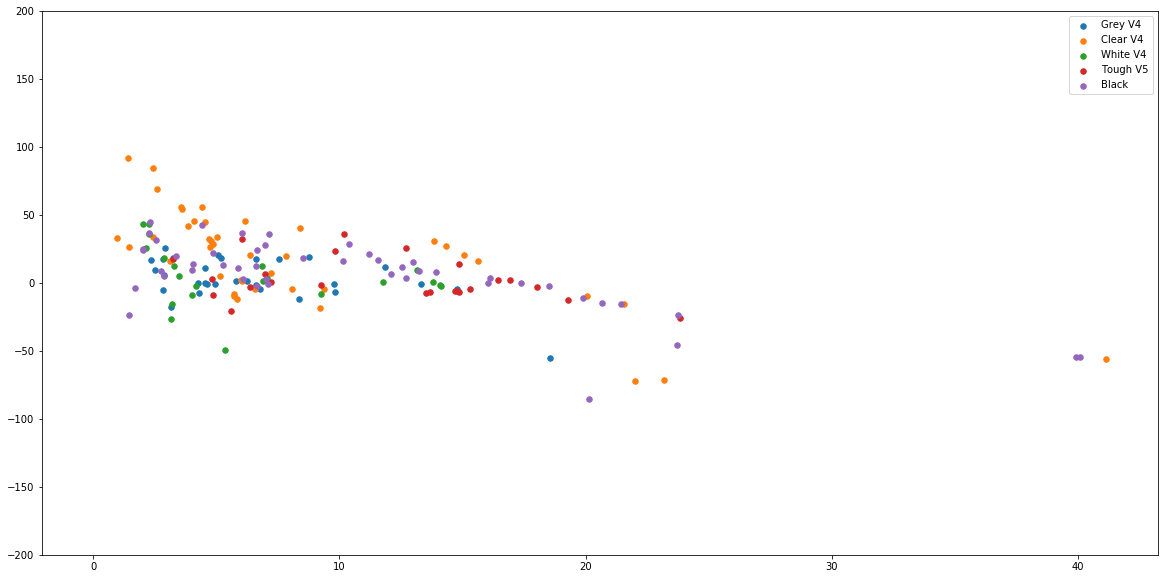

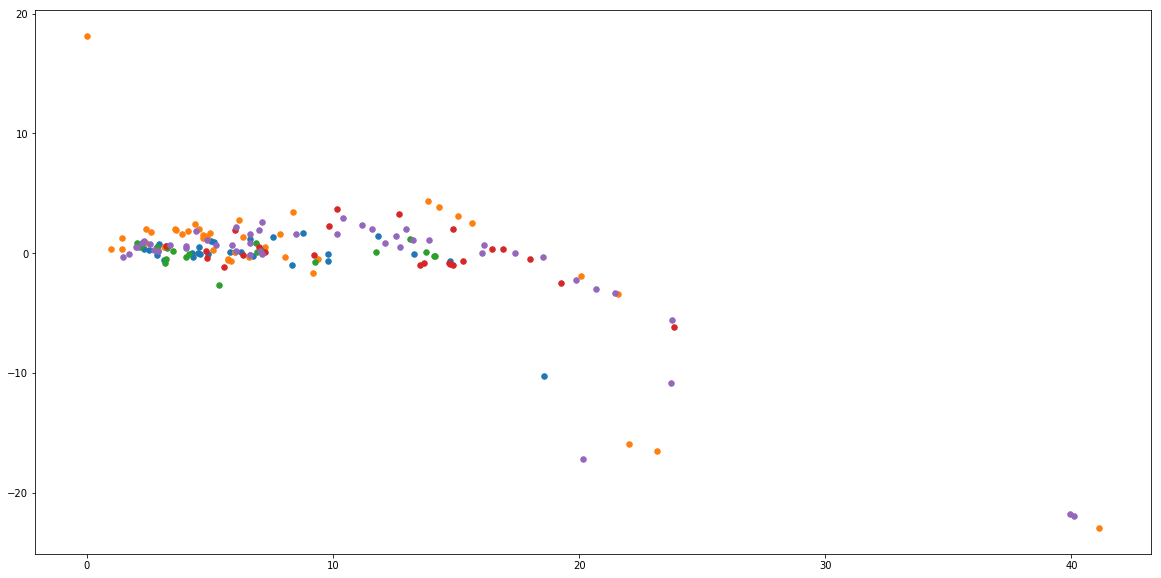

In [123]:
import matplotlib.pyplot as plt
print(np.mean((abs_error)))
print(np.median((abs_error)))
print(np.std((abs_error)))

plt.figure(figsize = (20,10))
legend = []
for keys in color_list['color'].keys():
    plt.scatter(y_scaler.inverse_transform([color_list['color'][keys]['y_value']]),color_list['color'][keys]['error'],s=30)
    legend.append(keys)

#plt.scatter(y_scaler.inverse_transform([y_train[:]]),(error))
plt.ylim(-200,200)
plt.legend(legend)
plt.figure(figsize = (20,10))
for keys in color_list['color'].keys():
    plt.scatter(y_scaler.inverse_transform([color_list['color'][keys]['y_value']]),color_list['color'][keys]['abs error'],s=30)



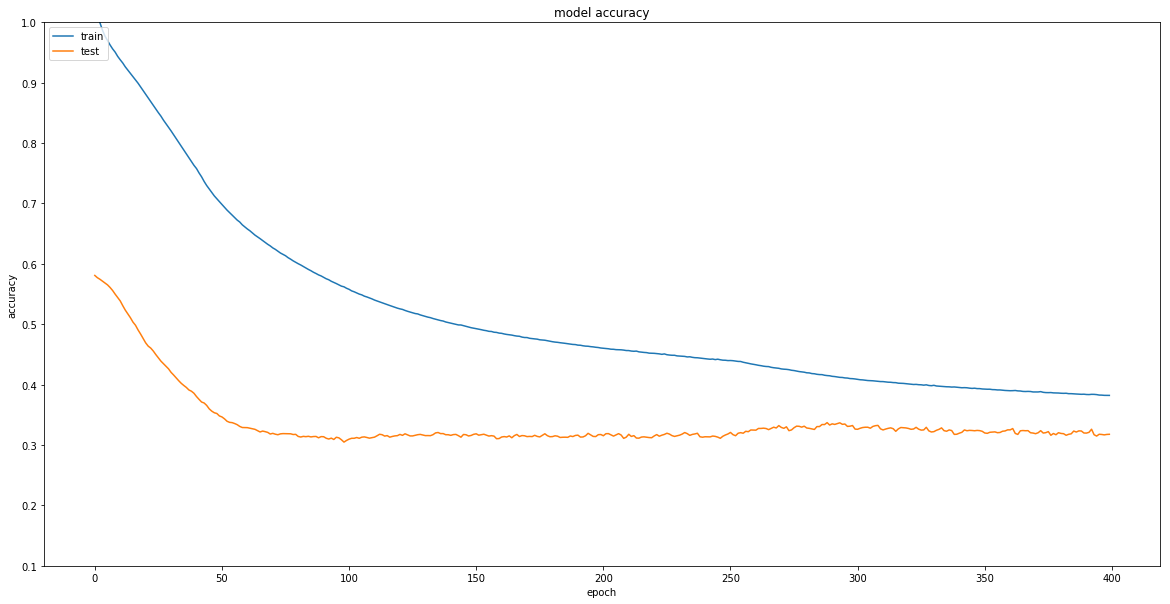

In [118]:
plt.figure(figsize=[20,10])
plt.plot(NN_model.history.history['loss'])
plt.plot(NN_model.history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [132]:
NN_model.predict(np.array([X_train[0,:]]))

array([[1.3513875]], dtype=float32)

In [133]:
# from keras.utils import plot_model
# import os
# PS = r'C:\Users\Steve\Anaconda2\envs\TensorFlowTho\Library\bin\graphviz'
# os.environ["PATH"] += os.pathsep + PS 
# plot_model(NN_model, to_file='model.png',show_shapes = True,show_layer_names=True)

In [124]:
# Save Nueral Network Model
filename = 'Quote Tool Cleaned Data 1-17-19 R1' + '.json'
# serialize model to JSON
model_json = NN_model.to_json()
with open(filename, "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
NN_model.save_weights("Quote Tool Cleaned Data 1-17-19 R1")
print("Saved model to disk")

Saved model to disk
